In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
# Đọc dữ liệu từ file csv
df = pd.read_csv('DOGE-USD.csv')

In [ ]:
# Chuyển cột 'Date' sang dạng datetime và đặt làm index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
# Chỉ lấy cột 'Close' làm dữ liệu dự đoán
data = df[['Close']]

In [ ]:
# Function to train ARIMA model and predict future prices
def train_and_predict_arima(data, train_size, predict_days):
    # Chia dữ liệu train và test
    train_data = data[:int(len(data) * train_size)]
    test_data = data[int(len(data) * train_size):]

    # Huấn luyện mô hình ARIMA
    model = ARIMA(train_data, order=(5, 1, 0))  # Thông số (p, d, q) có thể được tối ưu hóa
    model_fit = model.fit()

    # Dự đoán trên dữ liệu test
    y_pred_test = model_fit.forecast(steps=len(test_data))

    # Dự đoán giá đóng cửa cho các ngày tiếp theo
    predictions = {}
    for days in predict_days:
        y_pred = model_fit.forecast(steps=len(test_data) + days)[-days:]
        predictions[f'{days}_days'] = y_pred

    return train_data, test_data, y_pred_test, predictions

In [ ]:
# Các tỷ lệ train-test
train_test_ratios = [0.6, 0.7, 0.8]
predict_days = [30, 60, 90]
results = {}


In [ ]:
# Huấn luyện và dự đoán cho từng tỷ lệ
for ratio in train_test_ratios:
    train_data, test_data, y_pred_test, predictions = train_and_predict_arima(data, ratio, predict_days)
    results[ratio] = {
        'train_data': train_data,
        'test_data': test_data,
        'y_pred_test': y_pred_test,
        'predictions': predictions
    }

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

In [ ]:
# Function to calculate metrics
def calculate_metrics(true_values, predicted_values):
    mse = mean_squared_error(true_values, predicted_values)
    mae = mean_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((true_values - predicted_values) / true_values)) * 100
    return mse, mae, rmse, mape

In [ ]:
# Tính toán sai số cho từng tỷ lệ và in ra giá trị dự đoán
for ratio, result in results.items():
    train_percent = round(ratio * 100)
    test_percent = round((1 - ratio) * 100)
    print(f"Train-Test Ratio: {train_percent}:{test_percent}")

Train-Test Ratio: 60:40
Train-Test Ratio: 70:30
Train-Test Ratio: 80:20


In [ ]:
# Sai số trên dữ liệu test
mse, mae, rmse, mape = calculate_metrics(result['test_data']['Close'], result['y_pred_test'])
print(f"Test MSE: {mse}")
print(f"Test MAE: {mae}")
print(f"Test RMSE: {rmse}")
print(f"Test MAPE: {mape}\n")


Test MSE: 0.0005168244503449205
Test MAE: 0.01858635882451809
Test RMSE: 0.022733773341548923
Test MAPE: 22.074253838234487



In [ ]:
# Sai số trên các dự đoán 30, 60, 90 ngày và in ra giá trị dự đoán
for days in predict_days:
    pred_index = pd.date_range(start=result['test_data'].index[-1], periods=days + 1, freq='D')[1:]
    true_values = data['Close'].reindex(pred_index, method='nearest')
# Lấy giá trị thực tế tương ứng
predicted_values = result['predictions'][f'{days}_days']
mse, mae, rmse, mape = calculate_metrics(true_values, predicted_values)
print(f"{days} Days Predictions:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print("Predicted values:")
print(predicted_values)
print("\n")

90 Days Predictions:
MSE: 0.0011115480126359034
MAE: 0.033339886212101925
RMSE: 0.03333988621210191
MAPE: 36.22955556387674
Predicted values:
2024-01-02    0.058684
2024-01-03    0.058684
2024-01-04    0.058684
2024-01-05    0.058684
2024-01-06    0.058684
                ...   
2024-03-27    0.058684
2024-03-28    0.058684
2024-03-29    0.058684
2024-03-30    0.058684
2024-03-31    0.058684
Freq: D, Name: predicted_mean, Length: 90, dtype: float64




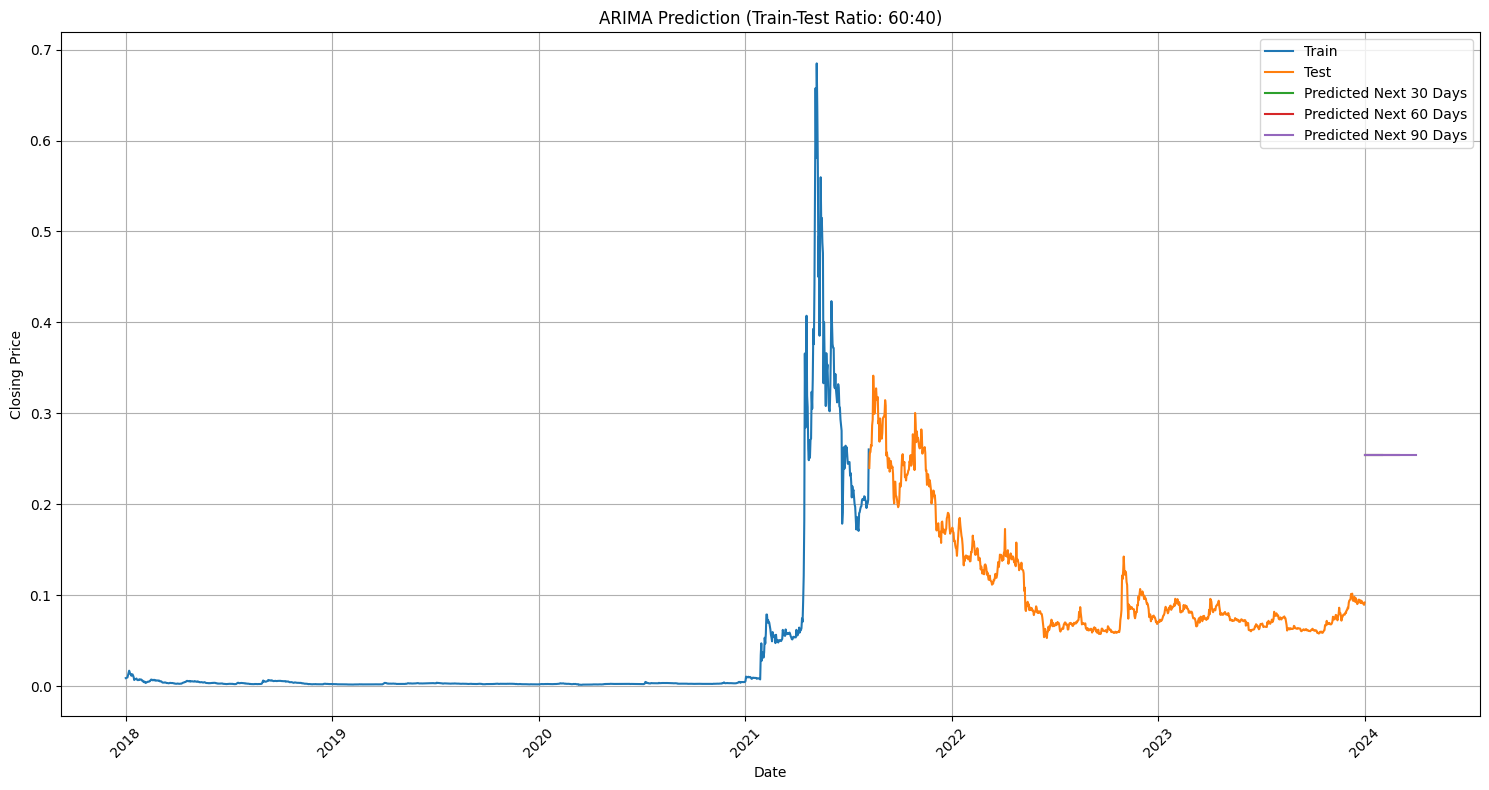

Completed plotting for train-test ratio 60:40


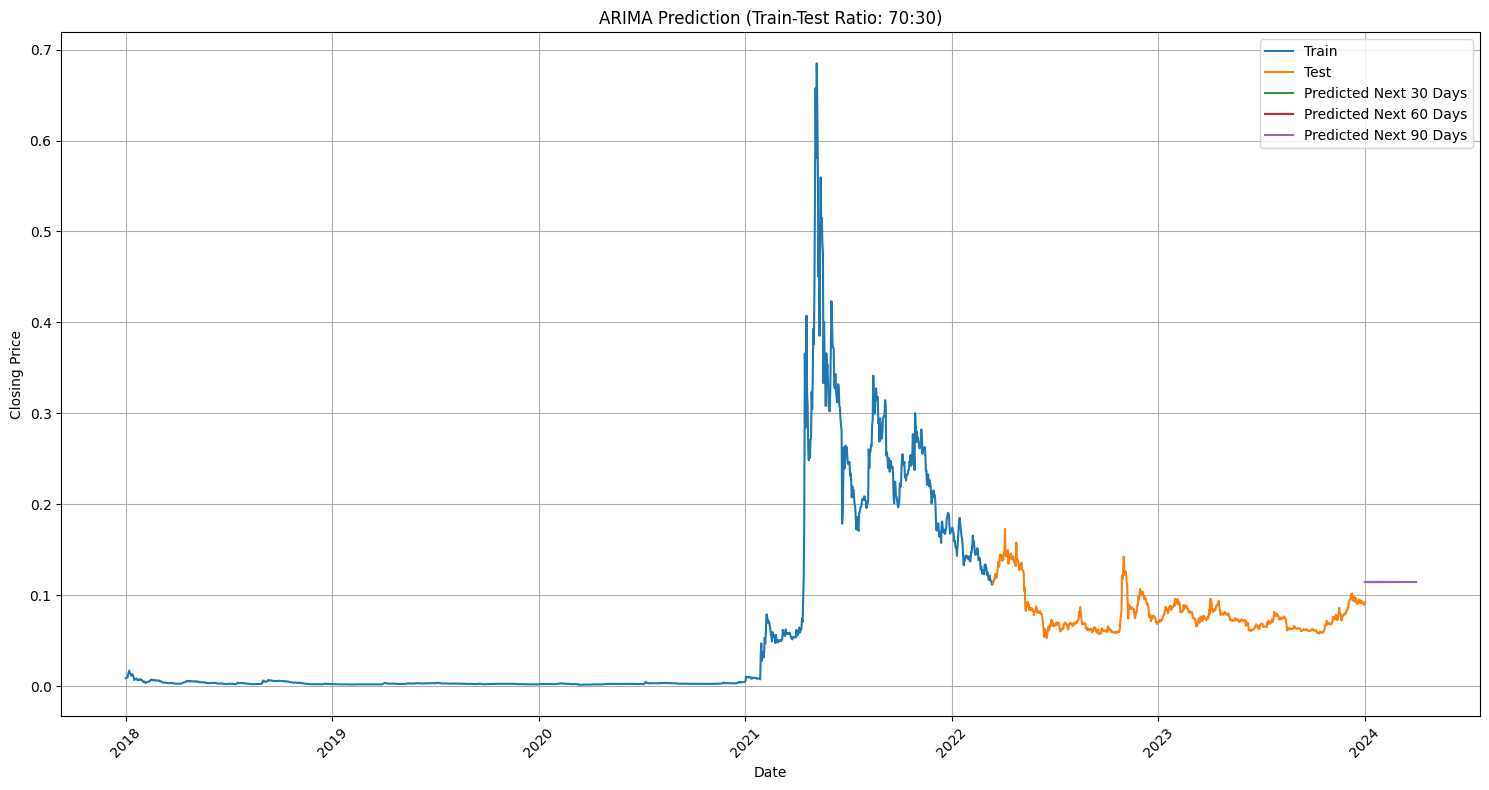

Completed plotting for train-test ratio 70:30


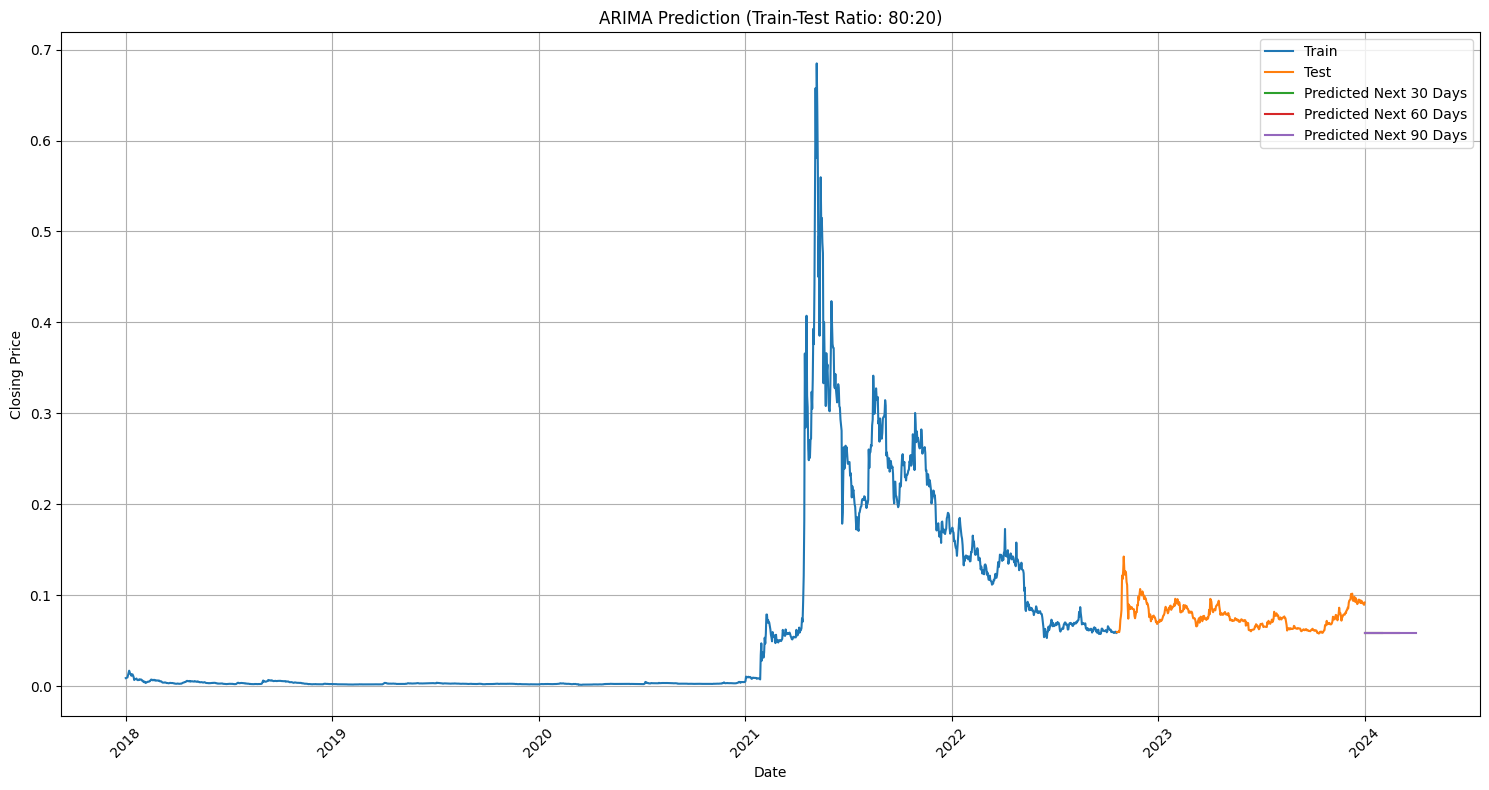

Completed plotting for train-test ratio 80:20


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Giả định rằng bạn đã định nghĩa 'results' trước đó
for ratio, result in results.items():
    train_percent = round(ratio * 100)
    test_percent = round((1 - ratio) * 100)
    plt.figure(figsize=(15, 8))
    plt.plot(result['train_data'].index, result['train_data']['Close'], label='Train')
    plt.plot(result['test_data'].index, result['test_data']['Close'], label='Test')

    for days in predict_days:
        pred_index = pd.date_range(start=result['test_data'].index[-1], periods=days + 1, freq='D')[1:]
        plt.plot(pred_index, result['predictions'][f'{days}_days'], label=f'Predicted Next {days} Days')

    plt.title(f'ARIMA Prediction (Train-Test Ratio: {train_percent}:{test_percent})')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print(f"Completed plotting for train-test ratio {train_percent}:{test_percent}")